# Random Forest Classification

TODO:
- remove outliers [IS IT NEEDED?] No
- encode the dataset prooperly [DONE]
- check if the model is balanced [IS IT NEEDED?] Yes
- reduce the dataset to 5000 records, to reduce noise [DONE]
- iterate over 70x30 [DONE]
- use gridsearch to improve the metrics [source](https://www.mygreatlearning.com/blog/gridsearchcv/)
- compare alternative models using pycaret
- split file [source](https://www.youtube.com/watch?v=kFwe2ZZU7yw&t=363s)
  
    

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
# import graphviz

from matplotlib import pyplot as plt


In [60]:
data= pd.read_csv('data/ml_class_df.csv',index_col=None)
item_data = data
item_data.head()

,item_category,item_condition,item_postcode,item_available_timer,distance,n_views,n_likes,item_available,item_id
0,furniture,good,13129,0,14626,1513,45,yes,1
1,other,like_new,13583,20,6955,1883,338,yes,2
2,kids,poor,10629,36,29203,36,5,no,3
3,kids,like_new,13088,86,985,1573,94,no,4
4,clothes,good,12623,86,23492,1648,32,no,5


#### Features:

https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

- item_category
- item_condition
- item_postcode
- item_available_timer in hours
- distance (item-user in meters)
- n_views
- n_likes
- item_done = y -> if the item is still available (this is what we’re trying to predict)

In [61]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         5000 non-null   object
 1   item_condition        5000 non-null   object
 2   item_postcode         5000 non-null   int64 
 3   item_available_timer  5000 non-null   int64 
 4   distance              5000 non-null   int64 
 5   n_views               5000 non-null   int64 
 6   n_likes               5000 non-null   int64 
 7   item_available        5000 non-null   object
 8   item_id               5000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 351.7+ KB


In [62]:
# item_data['item_postcode'] = item_data['item_postcode'].astype(str)

In [63]:
# saved_copy_item_data = item_data.copy()

In [64]:
# remove categorical data
# item_data_clean = item_data.drop('item_postcode', axis=1)


In [65]:
item_data.head()

,item_category,item_condition,item_postcode,item_available_timer,distance,n_views,n_likes,item_available,item_id
0,furniture,good,13129,0,14626,1513,45,yes,1
1,other,like_new,13583,20,6955,1883,338,yes,2
2,kids,poor,10629,36,29203,36,5,no,3
3,kids,like_new,13088,86,985,1573,94,no,4
4,clothes,good,12623,86,23492,1648,32,no,5


In [66]:
item_data.describe().T

,count,mean,std,min,25%,50%,75%,max
item_postcode,5000.0,12234.7852,1236.940332,10119.0,10823.00,12355.0,13353.00,14199.0
item_available_timer,5000.0,48.6992,29.000816,0.0,23.00,48.0,74.00,99.0
distance,5000.0,15716.6744,9178.400464,15.0,7832.00,15492.0,23638.25,31988.0
n_views,5000.0,996.6536,584.483609,0.0,490.75,998.5,1511.00,2000.0
n_likes,5000.0,95.7634,86.682484,0.0,24.00,72.0,146.00,379.0
item_id,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0


Text(0.5, 0, 'Frequency')

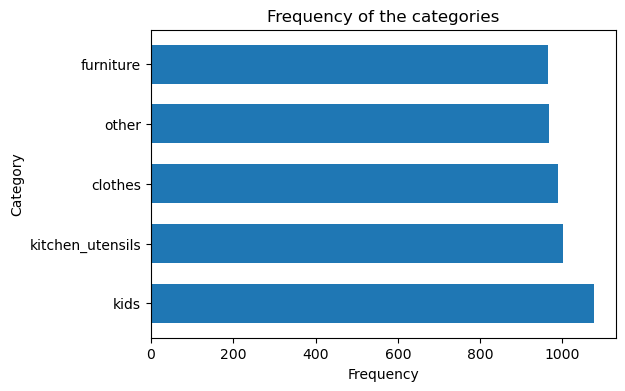

In [67]:
ax = item_data['item_category'].value_counts().plot(kind='barh', 
                                                   figsize=(6,4), 
                                                  width=.65)                                         
                                                                                       
ax.set_title("Frequency of the categories")
ax.set_ylabel("Category")
ax.set_xlabel("Frequency") 

Text(0.5, 0, 'Frequency')

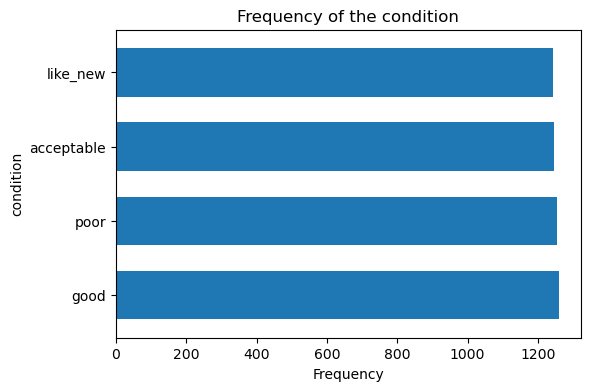

In [68]:
ax = item_data['item_condition'].value_counts().plot(kind='barh', 
                                                   figsize=(6,4), 
                                                  width=.65)                                         
                                                                                       
ax.set_title("Frequency of the condition")
ax.set_ylabel("condition")
ax.set_xlabel("Frequency")

/var/folders/xs/pmxwbppj14b4v76l4llp17n80000gp/T/ipykernel_97316/1153628992.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = item_data.corr()


<Axes: >

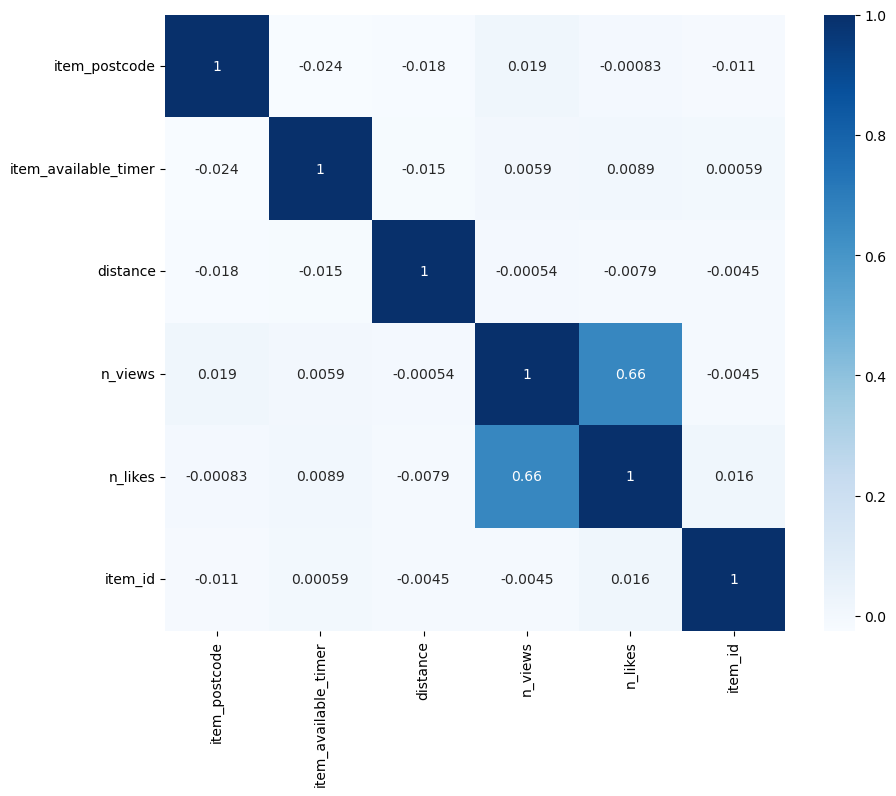

In [69]:
#correlations
corr = item_data.corr()
# corr.style.background_gradient(cmap='blues')

fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(corr, cmap="Blues", annot=True)

In [70]:
# g = sns.pairplot(item_data_clean, hue='item_done')
# g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by done_or_available", 
#                fontsize = 14, # defining the size of the title
#                y=1.05); # y = definig title y position (height)


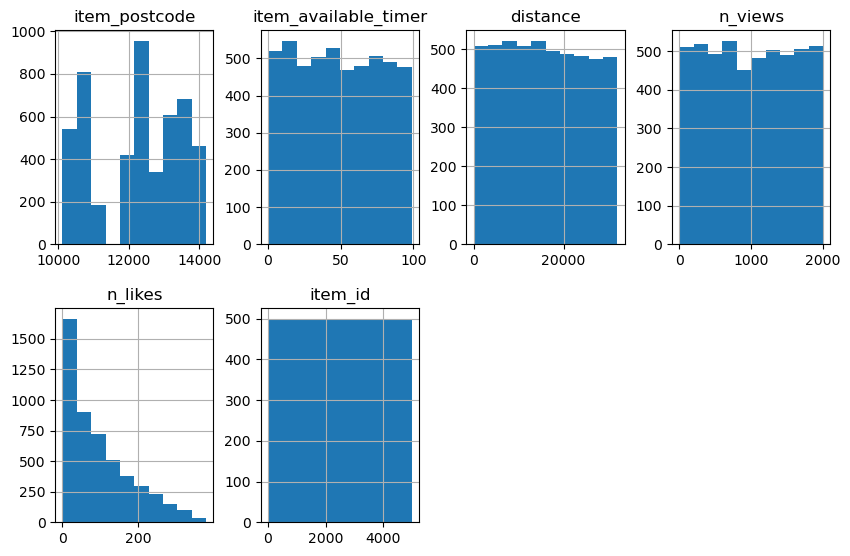

In [71]:
hist = item_data.hist(figsize=(10,10),layout=(3,4))

### Outliers

<Axes: >

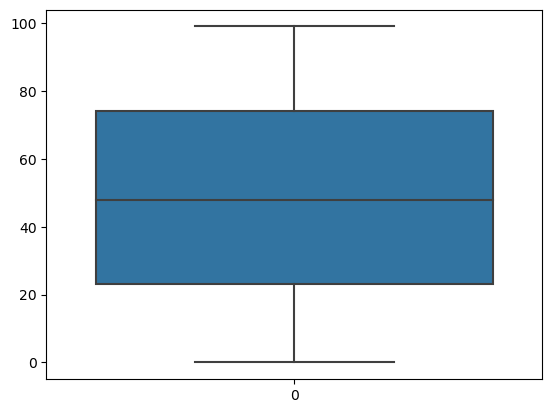

In [72]:
sns.boxplot(item_data['item_available_timer'])

<Axes: >

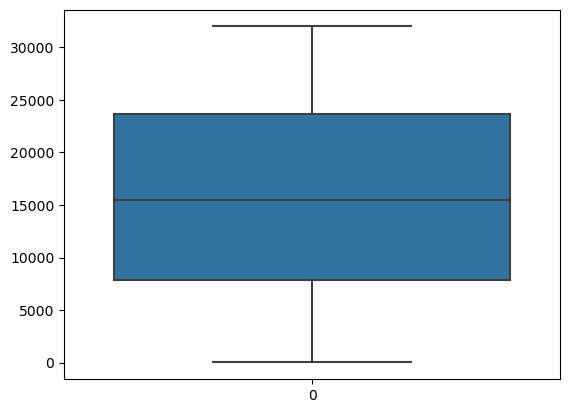

In [73]:
sns.boxplot(item_data['distance'])

<Axes: >

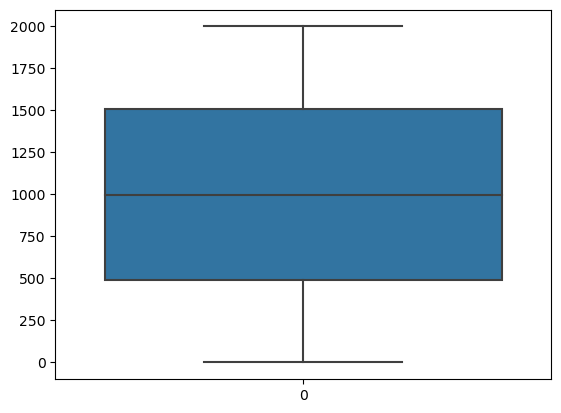

In [74]:
sns.boxplot(item_data['n_views'])

<Axes: >

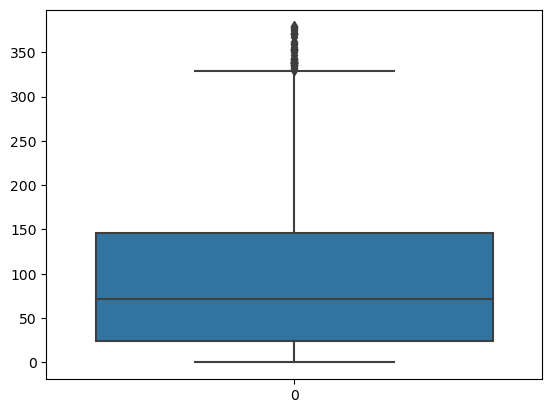

In [75]:
sns.boxplot(item_data['n_likes'])

<Axes: >

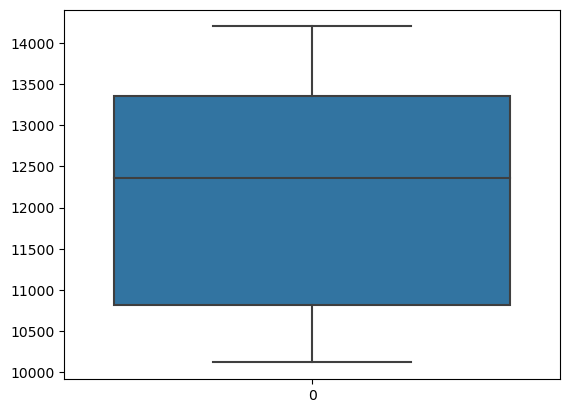

In [76]:
sns.boxplot(item_data['item_postcode'])

In [77]:
item_data.shape

(5000, 9)

In [78]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         5000 non-null   object
 1   item_condition        5000 non-null   object
 2   item_postcode         5000 non-null   int64 
 3   item_available_timer  5000 non-null   int64 
 4   distance              5000 non-null   int64 
 5   n_views               5000 non-null   int64 
 6   n_likes               5000 non-null   int64 
 7   item_available        5000 non-null   object
 8   item_id               5000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 351.7+ KB


In [79]:
# item_data['item_postcode'] = item_data['item_postcode'].astype('string')
# item_data.info()

In [80]:
categorical_vars = [ 'item_category', 'item_condition', 'item_postcode', 'item_available']

## Is the dataset balanced?

In [81]:
print('Total of recorded items available: ', item_data[item_data['item_available'] =='yes'].shape[0])
print('Total of recorded items not available: ', item_data[item_data['item_available'] =='no'].shape[0])

Total of recorded items available:  2560
Total of recorded items not available:  2440


https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

## Preprocessing Data

In [82]:
# item_data['item_postcode'] = pd.to_numeric(item_data['item_postcode'])
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         5000 non-null   object
 1   item_condition        5000 non-null   object
 2   item_postcode         5000 non-null   int64 
 3   item_available_timer  5000 non-null   int64 
 4   distance              5000 non-null   int64 
 5   n_views               5000 non-null   int64 
 6   n_likes               5000 non-null   int64 
 7   item_available        5000 non-null   object
 8   item_id               5000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 351.7+ KB


In [83]:
print(pd.unique(item_data['item_postcode']))
print(len(pd.unique(item_data['item_postcode'])))

[13129 13583 10629 13088 12623 12051 12099 12105 12435 12163 10405 13591
 12053 10965 10785 10961 10717 10369 14052 12249 13057 10823 12685 13156
 12459 10435 14089 10119 10789 14199 10551 13585 12045 10557 10179 13347
 13351 12559 10825 13597 13158 10827 13349 12203 10829 12307 10625 12627
 14195 12279 13437 13589 12489 12161 12207 12347 10715 10707 12047 12349
 14193 12209 10367 14167 10245 10719 13359 10439 13409 13055 12167 13465
 12103 14109 10587 12309 14050 12687 12157 13509 13353 13587 10315 12107
 10623 13053 10249 10247 13187 12681 13507 13467 12109 12351 14053 10781
 12357 13059 13159 10627 10407 12353 10963 14055 12689 12526 13355 10555
 12629 12205 12359 12621 10318 12049 12437 13357 10783 13581 12487 12679
 12589 12305 12057 10559 13435 10779 10999 13593 10437 13405 10178 10243
 10365 10553 13503 10997 12439 14197 13089 13505 12557 10969 13629 13439
 12587 13599 10967 13407 13086 10585 12277 12555 13595 14169 13051 10711
 12355 14165 14129 12683 12043 14059 13127 13125 12

In [84]:
### [ABOORTED] idea to normalyse postcode acccording with the population

In [85]:
# postcode_pop_original= pd.read_csv('data/postalcode_pop.csv',index_col=None)
# postcode_pop = postcode_pop_original
# postcode_pop.head()

In [86]:

# postcode_pop['population'] = postcode_pop['population'].str.replace(',' , '').replace('—', '').replace('—', '')


In [87]:
# # postcode_pop.info()

# postcode_pop['population'] = pd.to_numeric(postcode_pop['population'])

# postcode_pop = postcode_pop.dropna()
# len(postcode_pop)

In [88]:
# postcode_pop.isna().sum()

In [89]:
# from sklearn.preprocessing import MinMaxScaler

  
# # copy the data
# postcode_pop_sklearn = postcode_pop.copy()
  
# # apply normalization techniques
# column = 'pop'
# postcode_pop_sklearn['population'] = MinMaxScaler().fit_transform(np.array(postcode_pop_sklearn['population']).reshape(-1,1))
  
# # view normalized data  
# display(postcode_pop_sklearn)

In [90]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         5000 non-null   object
 1   item_condition        5000 non-null   object
 2   item_postcode         5000 non-null   int64 
 3   item_available_timer  5000 non-null   int64 
 4   distance              5000 non-null   int64 
 5   n_views               5000 non-null   int64 
 6   n_likes               5000 non-null   int64 
 7   item_available        5000 non-null   object
 8   item_id               5000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 351.7+ KB


In [91]:
item_data.columns

Index(['item_category', 'item_condition', 'item_postcode',
       'item_available_timer', 'distance', 'n_views', 'n_likes',
       'item_available', 'item_id'],
      dtype='object')

In [92]:
item_data['item_available'].unique()

array(['yes', 'no'], dtype=object)

In [93]:
item_data['item_postcode'].unique()

array([13129, 13583, 10629, 13088, 12623, 12051, 12099, 12105, 12435,
       12163, 10405, 13591, 12053, 10965, 10785, 10961, 10717, 10369,
       14052, 12249, 13057, 10823, 12685, 13156, 12459, 10435, 14089,
       10119, 10789, 14199, 10551, 13585, 12045, 10557, 10179, 13347,
       13351, 12559, 10825, 13597, 13158, 10827, 13349, 12203, 10829,
       12307, 10625, 12627, 14195, 12279, 13437, 13589, 12489, 12161,
       12207, 12347, 10715, 10707, 12047, 12349, 14193, 12209, 10367,
       14167, 10245, 10719, 13359, 10439, 13409, 13055, 12167, 13465,
       12103, 14109, 10587, 12309, 14050, 12687, 12157, 13509, 13353,
       13587, 10315, 12107, 10623, 13053, 10249, 10247, 13187, 12681,
       13507, 13467, 12109, 12351, 14053, 10781, 12357, 13059, 13159,
       10627, 10407, 12353, 10963, 14055, 12689, 12526, 13355, 10555,
       12629, 12205, 12359, 12621, 10318, 12049, 12437, 13357, 10783,
       13581, 12487, 12679, 12589, 12305, 12057, 10559, 13435, 10779,
       10999, 13593,

In [94]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         5000 non-null   object
 1   item_condition        5000 non-null   object
 2   item_postcode         5000 non-null   int64 
 3   item_available_timer  5000 non-null   int64 
 4   distance              5000 non-null   int64 
 5   n_views               5000 non-null   int64 
 6   n_likes               5000 non-null   int64 
 7   item_available        5000 non-null   object
 8   item_id               5000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 351.7+ KB


In [95]:

#, 'item_postcode','item_available_timer', 'distance', 'n_views', 'n_likes', 'item_done'

### Encoding

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/?

In [96]:
# I am going to drop postcodes because it has too many unique items
item_data = item_data.drop('item_postcode', axis=1)
item_data.head()

,item_category,item_condition,item_available_timer,distance,n_views,n_likes,item_available,item_id
0,furniture,good,0,14626,1513,45,yes,1
1,other,like_new,20,6955,1883,338,yes,2
2,kids,poor,36,29203,36,5,no,3
3,kids,like_new,86,985,1573,94,no,4
4,clothes,good,86,23492,1648,32,no,5


In [97]:
# item_category = ['furniture',  'clothes',  'kitchen_utensils', 'kids', 'other'] 
# item_condition = ['poor', 'acceptable', 'good', 'like_new']
# item_available = ['yes', 'no']

In [98]:
# encoding

item_data['item_available'] = item_data['item_available'].replace('no', 0).replace('yes', 1)
item_data['item_category'] = item_data['item_category'].replace('furniture', 1).replace('clothes', 2).replace('kitchen_utensils', 3).replace('kids', 4).replace('other', 5)
item_data['item_condition'] = item_data['item_condition'].replace('like_new', 1).replace('good', 2).replace('acceptable', 3).replace('poor', 4)

item_data.head()

,item_category,item_condition,item_available_timer,distance,n_views,n_likes,item_available,item_id
0,1,2,0,14626,1513,45,1,1
1,5,1,20,6955,1883,338,1,2
2,4,4,36,29203,36,5,0,3
3,4,1,86,985,1573,94,0,4
4,2,2,86,23492,1648,32,0,5


In [99]:
# item_onehot = pd.get_dummies(item_data[['item_category', 'item_condition']], prefix=['cat','cond'], prefix_sep="_")
# # item_onehot.head()
# item_onehot[['item_id', 'item_available_timer', 'distance', 'n_views', 'n_likes', 'item_done']] = item_data[['item_id', 'item_available_timer', 'distance', 'n_views', 'n_likes', 'item_done']]

# # move item_id to the first coolumn
# fixed_columns = [item_onehot.columns[-1]] + list(item_onehot.columns[:-1])
# item_onehot = item_onehot[fixed_columns]
# # item_grouped = item_onehot.groupby('item_id').mean().reset_index()

# item_onehot.head()


In [100]:
# ### Removing outliers of n_likes

# Q1 = np.percentile(item_data, 25, axis=0)
# Q3 = np.percentile(item_data, 75, axis=0)
# IQR = Q3 - Q1
# threshold = 1.5
# filtered_data = item_data[~((item_data < (Q1 - threshold * IQR)) | (item_data > (Q3 + threshold * IQR))).any(axis=1)]
# filtered_data.head()
# filtered_data.shape

## Splitting the Data

In [101]:
# Split the data into features (X) and target (y)
X = item_data.drop(['item_available'], axis=1)
y = item_data['item_available']

In [102]:
print(y)

0       1
1       1
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    1
4999    0
Name: item_available, Length: 5000, dtype: int64


In [103]:
print(X)

      item_category  item_condition  item_available_timer  distance  n_views  \
0                 1               2                     0     14626     1513   
1                 5               1                    20      6955     1883   
2                 4               4                    36     29203       36   
3                 4               1                    86       985     1573   
4                 2               2                    86     23492     1648   
...             ...             ...                   ...       ...      ...   
4995              1               4                    17     17160      900   
4996              3               3                    25      1907     1370   
4997              2               4                    65     23393     1819   
4998              5               2                    59     27558        7   
4999              4               3                    84      3479      819   

      n_likes  item_id  
0          45 

In [104]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [105]:
# from sklearn.model_selection import train_test_split

# SEED = 42
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.2, 
#                                                     random_state=SEED)

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=SEED)

In [106]:
# from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3, 
                             max_depth=2,
                             random_state=SEED)

In [107]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1608637542)


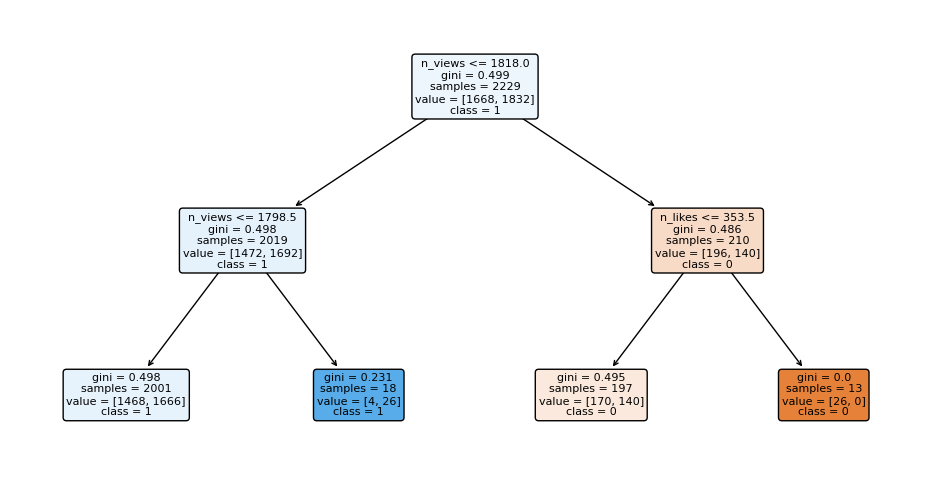

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1273642419)


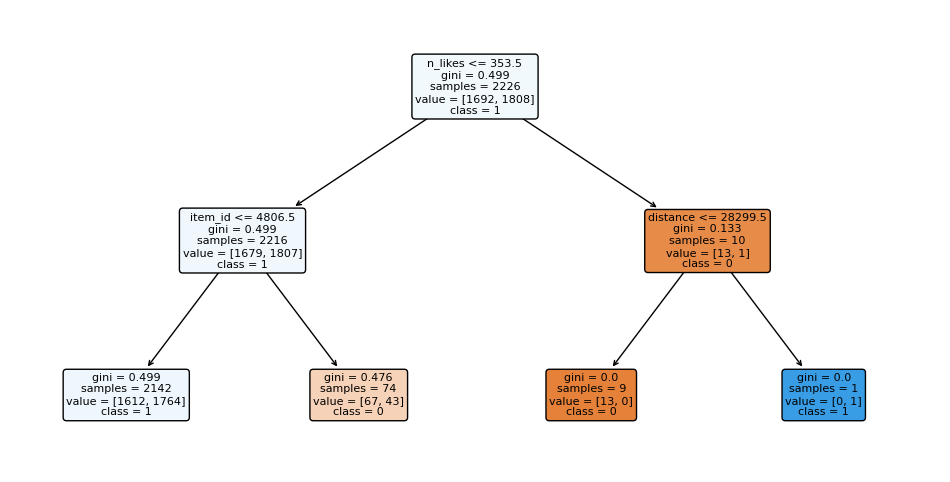

DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                       random_state=1935803228)


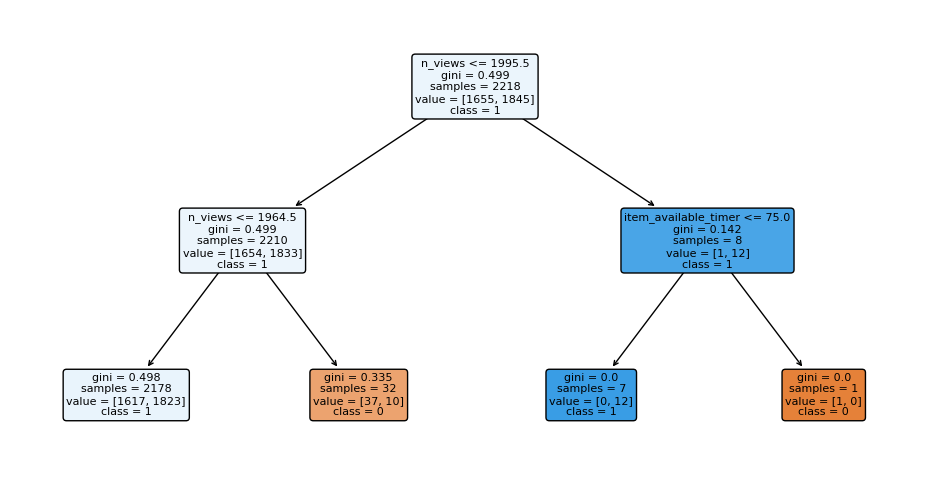

In [108]:
# Import `tree` module
from sklearn import tree

features = X.columns.values # The name of each column
classes = ['0', '1'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['no', 'yes']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.502
Mean Squared Error: 0.502
Root Mean Squared Error: 0.708519583356734


### Iteration 2

https://towardsdatascience.com/random-forest-classification-678e551462f5

In [110]:

# rfc = RandomForestClassifier(n_estimators=3, 
#                              max_depth=2,
#                              random_state=SEED)

In [111]:
rfc = RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18).fit(X_train, y_train)

In [112]:
# Create our predictions (clf)
prediction = rfc_2.predict(X_test)


In [113]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
confusion_matrix(y_test, prediction)


array([[ 88, 678],
       [ 71, 663]])

In [114]:
# Display accuracy score
accuracy_score(y_test, prediction)


0.5006666666666667

In [115]:
# Display F1 score
f1_score(y_test,prediction)

0.6390361445783133

In [116]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.502
Mean Squared Error: 0.502
Root Mean Squared Error: 0.708519583356734


Sugestion to improve the mock dataset
Webscrape
- [Facebook group freeyourstuffberlin](https://www.facebook.com/groups/freeyourstuff/members)
- [website freeyourstuffberlin](https://www.free-your-stuff.com/de/berlin)
- [demografic statistics](https://postal-codes.cybo.com/germany/berlin/)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

tps://postal-codes.cybo.com/germany/berlin/